In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

In [2]:
# Settings
num_rows = 5368709  # Rows to generate (~1 GB dataset)
sampling_rate_hz = 10  # Samples per second

In [3]:
# Generate timestamps
start_time = datetime.now()
timestamps = [start_time + timedelta(seconds=i/sampling_rate_hz) for i in range(num_rows)]

In [4]:
# Generate synthetic data
np.random.seed(42)
cpu_temperatures = np.random.normal(loc=50, scale=5, size=num_rows)  # Normal CPU temp
cpu_usages = np.random.normal(loc=30, scale=10, size=num_rows)  # Normal CPU usage
memory_usages = np.random.normal(loc=40, scale=8, size=num_rows)  # Normal memory usage

In [5]:
# Introduce anomalies
for i in range(num_rows):
    if random.random() < 0.1:  # 10% chance of anomaly
        cpu_usages[i] = random.uniform(90, 100)  # High CPU usage
    if random.random() < 0.1:
        cpu_temperatures[i] = random.uniform(90, 105)  # High temperature
    if random.random() < 0.1:
        memory_usages[i] = random.uniform(95, 100)  # High memory usage


In [6]:
# Create DataFrame
data = {
    'timestamp': timestamps,
    'cpu_temperature': cpu_temperatures,
    'cpu_usage': cpu_usages,
    'memory_usage': memory_usages,
}
df = pd.DataFrame(data)


In [7]:
# Save Data to CSV
csv_filename = 'synthetic_hardware_data_1GB.csv'
df.to_csv(csv_filename, index=False)

print(f"Dataset with {num_rows} rows saved to {csv_filename}.")

Dataset with 5368709 rows saved to synthetic_hardware_data_1GB.csv.


In [8]:
# Anomaly Detection on Large Dataset

In [9]:
# Anomaly Detection using z-score in chunks
from scipy.stats import zscore

chunk_size = 100000  # Process 100,000 rows at a time
anomalies = []

for chunk in pd.read_csv(csv_filename, chunksize=chunk_size):
    chunk['cpu_usage_zscore'] = zscore(chunk['cpu_usage'])
    chunk['anomaly_cpu_usage'] = chunk['cpu_usage_zscore'].apply(lambda x: 1 if abs(x) > 3 else 0)
    anomalies.append(chunk[chunk['anomaly_cpu_usage'] == 1])

# Combine anomalies
anomalies = pd.concat(anomalies)
print("Detected Anomalies:")
print(anomalies[['timestamp', 'cpu_usage', 'cpu_usage_zscore']])

# Save anomalies to a file
anomalies.to_csv('anomalies.csv', index=False)
print("Anomalies saved to 'anomalies.csv'.")

Detected Anomalies:
Empty DataFrame
Columns: [timestamp, cpu_usage, cpu_usage_zscore]
Index: []
Anomalies saved to 'anomalies.csv'.


In [11]:
import os

# Check file size and load basic metadata
file_path = '/content/synthetic_hardware_data_1GB.csv'
file_size_gb = os.path.getsize(file_path) / (1024 ** 3)  # Convert size to GB

file_size_gb


0.4090797808021307

In [13]:
# Required libraries
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Settings for larger dataset
num_rows = 13000000  # Approximately 13 million rows
sampling_rate_hz = 10  # Samples per second

# Generate timestamps
start_time = datetime.now()
timestamps = [start_time + timedelta(seconds=i/sampling_rate_hz) for i in range(num_rows)]

# Generate synthetic data
np.random.seed(42)
cpu_temperatures = np.random.normal(loc=50, scale=5, size=num_rows)
cpu_usages = np.random.normal(loc=30, scale=10, size=num_rows)
memory_usages = np.random.normal(loc=40, scale=8, size=num_rows)
disk_usages = np.random.normal(loc=60, scale=10, size=num_rows)
network_activity = np.random.normal(loc=100, scale=20, size=num_rows)

# Introduce anomalies
for i in range(num_rows):
    if random.random() < 0.1:  # 10% chance of anomaly
        cpu_usages[i] = random.uniform(90, 100)
    if random.random() < 0.1:
        cpu_temperatures[i] = random.uniform(90, 105)
    if random.random() < 0.1:
        memory_usages[i] = random.uniform(95, 100)

# Create DataFrame
data = {
    'timestamp': timestamps,
    'cpu_temperature': cpu_temperatures,
    'cpu_usage': cpu_usages,
    'memory_usage': memory_usages,
    'disk_usage': disk_usages,
    'network_activity': network_activity,
}
df_large = pd.DataFrame(data)

# Save to CSV
csv_filename = '/content/synthetic_hardware_data_1GB.csv'
df_large.to_csv(csv_filename, index=False)

print(f"Dataset with {num_rows} rows saved to {csv_filename}.")


Dataset with 13000000 rows saved to /content/synthetic_hardware_data_1GB.csv.


In [14]:
import os

# File path
file_path = '/content/synthetic_hardware_data_1GB.csv'

# Get file size in GB
file_size_gb = os.path.getsize(file_path) / (1024 ** 3)
print(f"File size: {file_size_gb:.2f} GB")


File size: 1.43 GB


# Anomaly Detection and Visualization (Z-Score Method)

In [19]:
import pandas as pd

# Load the dataset
file_path = '/content/synthetic_hardware_data_1GB.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


                    timestamp  cpu_temperature  cpu_usage  memory_usage  \
0  2024-11-30 05:35:48.686526        52.483571  21.736475     27.621207   
1  2024-11-30 05:35:48.786526        49.308678  91.908725     34.334427   
2  2024-11-30 05:35:48.886526        53.238443  33.615895     33.011231   
3  2024-11-30 05:35:48.986526        57.615149  26.824692     37.669579   
4  2024-11-30 05:35:49.086526        48.829233   9.855740     45.687827   

   disk_usage  network_activity  
0   45.011881         65.055121  
1   74.502977         77.649825  
2   48.089639        135.162247  
3   61.957754        129.130781  
4   46.238956         78.785481  


# Apply Z-Score for Anomaly Detection

In [20]:
from scipy.stats import zscore

# Choose columns to analyze
columns_to_check = ['cpu_temperature', 'cpu_usage', 'memory_usage']

# Compute Z-scores
z_scores = data[columns_to_check].apply(zscore)

# Set a threshold for anomalies (e.g., Z > 3 or Z < -3)
anomalies = (z_scores.abs() > 3)

# Mark anomalies in the dataset
data['is_anomaly'] = anomalies.any(axis=1)
print(data['is_anomaly'].value_counts())


is_anomaly
False    12565715
True       434285
Name: count, dtype: int64


# Visualize Anomalies

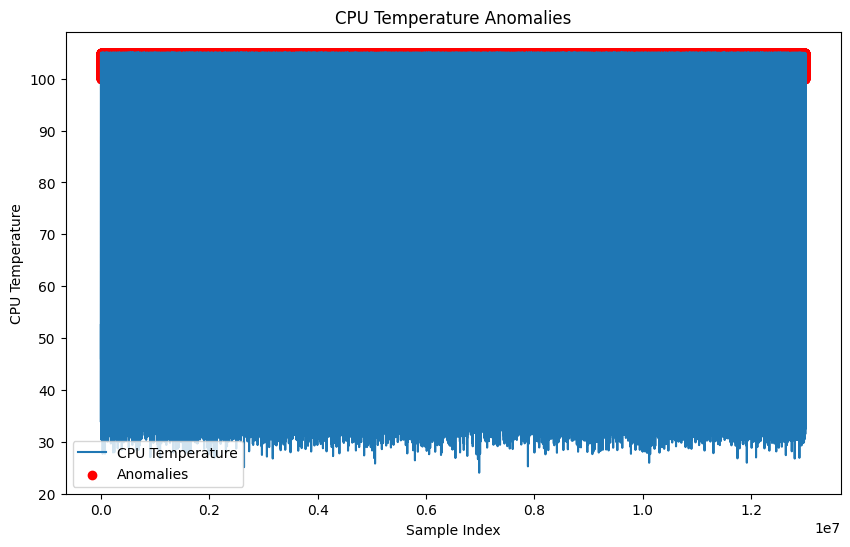

In [24]:
import matplotlib.pyplot as plt

# Plot CPU temperature with anomalies marked
plt.figure(figsize=(10, 6))
plt.plot(data['cpu_temperature'], label='CPU Temperature')
plt.scatter(data.index[data['is_anomaly']], data['cpu_temperature'][data['is_anomaly']],
            color='red', label='Anomalies')
plt.xlabel('Sample Index')
plt.ylabel('CPU Temperature')
plt.title('CPU Temperature Anomalies')
plt.legend()
plt.show()


In [22]:
plt.savefig('cpu_temperature_anomalies.png')


<Figure size 640x480 with 0 Axes>